# Machine Learning

* Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.


* Machine Learning is a subset of Artificial Intelligence which enables machines to learn from past data or experience without being explicity programmed.


* It's a technique to achieve AI through algorithms when exposed to more data over time.

## Classification of Machine Learning :-


* Supervised Learning


* Unsupervised Learning 


* Reinforcement Learning

# Artificial Intelligence (AI)

* Artificial Intelligence is the science and engineering of making computers capable of performing tasks that typically require human intelligence.


* It's a technique that can mimic human behaviour.

## Based on capabilities, AI classified as:-

* Applied AI(Weak AI) 


* Generalized AI (Strong AI)

# Deep Learning


* Deep Learning is a subset of Machine Learning concerned with the algorithms inspired by the structure and function of human brains.


* Subset of Machine Learning in which multilayered neural networks learn from vast amount of data

# What is Confusion Matrix?


* A confusion matrix is an N*N matrix used for evaluating the performance of a classification model, where N is the number of target classes.


* This compares the actual target values with predicted target values.

# Right Fit


* Ideally, the case when the model makes the predictions with 0 error, is said to have a good fit on the data.


* Model's performance is evaluated based upon Accuracy and Generalisation


* A model is said to be best when it behaves nearly same way on training as well as test data with high accuracy score.

# Accuracy 


* The number of predictions that the model got right


* It states how well a model predicts the right output.


# Generalisation 


It states how well model behaves on new data set


# Error Rate 


The number of predictions that the model predicted wrongly


# Precision


When the model predicts the positives, how often is it right?


# Recall


When it's actually yes, how often does it predict yes?


# 

# Underfitting


* Underfitting means model has low accuracy score on training as well as on test data.


* Underfitting occurs due to lack of data.


* Underfitting occurs when we try to build a linear model with a non-linear data.

# Overfitting 


* Overfitting means model has high accuracy score on training data but low score on test data.


* Overfitting occurs because of a lot more of data.


* Overfitting occurs when the model fits the data too well.

# What is Data Set?


A datset is a collection of records usually presented in tabular form.

# Types of Data :-


* Numeric Data (Quantitative)


* Categorical Data (Qualitative)


* Ordinal Data

# What is data pre-processing?


Data pre-processing is process of converting raw data into suitable form.

# Data Pre-Processing Steps Involves :-


1) Getting Dataset


2) Importing Libraries 


3) Importing Datasets


4) Finding Missing Values


5) Encoding Categorical Data 


6) Splitting Dataset into Training and Test Set


7) Feature Scaling

# Simple Imputer :- It fill null values by mean,mrdian,mode

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5716,Super built-up Area,Ready To Move,Marathahalli,3 BHK,Palanla,1435,3.0,1.0,73.0
2537,Super built-up Area,Ready To Move,Yelahanka,3 BHK,Niareum,1603,3.0,2.0,96.0
4255,Super built-up Area,Ready To Move,Malleshwaram,3 BHK,NaN,2600,3.0,1.0,237.0
7229,Super built-up Area,19-Jan,Kanakpura Road,3 BHK,PrityFa,1591,3.0,1.0,122.0
1408,Super built-up Area,21-Dec,Kanakpura Road,3 BHK,NaN,1300,2.0,3.0,69.0


In [3]:
x = df.drop('price',axis=1)
x.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0


## Convert Data Frame into Numpy Array because Simple Imputer work on array

In [4]:
x = df.drop('price',axis=1).values
x

array([['Super built-up  Area', '19-Dec', 'Electronic City Phase II',
        ..., '1056', 2.0, 1.0],
       ['Plot  Area', 'Ready To Move', 'Chikka Tirupathi', ..., '2600',
        5.0, 3.0],
       ['Built-up  Area', 'Ready To Move', 'Uttarahalli', ..., '1440',
        2.0, 3.0],
       ...,
       ['Built-up  Area', 'Ready To Move', 'Raja Rajeshwari Nagar', ...,
        '1141', 2.0, 1.0],
       ['Super built-up  Area', '18-Jun', 'Padmanabhanagar', ..., '4689',
        4.0, 1.0],
       ['Super built-up  Area', 'Ready To Move', 'Doddathoguru', ...,
        '550', 1.0, 1.0]], dtype=object)

In [5]:
y = df['price']
y.head(5)

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [6]:
df.shape

(13320, 9)

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
a = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (df.isna().sum()/df.shape[0]*100).tolist()]], 
           columns=df.columns, index=['NA Count', 'NA Percent']).transpose()

a.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

,NA Count,NA Percent
area_type,0,0.00%
availability,0,0.00%
location,1,0.01%
size,16,0.12%
society,5502,41.31%
total_sqft,0,0.00%
bath,73,0.55%
balcony,609,4.57%
price,0,0.00%


## If a column contains 70-80% or above null values so we drop that column otherwise we fill null values by mean,median,mode.

# Simple Imputer


* It is use to fill null values by mean, median, mode.

In [9]:
from sklearn.impute import SimpleImputer

Parameters in SimpleImputer() # Shift + Tab

* missing_values=nan,
* strategy='mean','median','most_frequent'
* fill_value=None,
* verbose=0,
* copy=True,
* add_indicator=False,

In [10]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

In [11]:
imputer = imputer.fit(x[:,7:])

In [12]:
x[:,7:] = imputer.transform(x[:,7:]) # (x[all rows,columns in which you want to apply simple imputer])

In [13]:
a = pd.DataFrame(x)
a.head()

,0,1,2,3,4,5,6,7
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0


In [14]:
a.isnull().sum()

0       0
1       0
2       1
3      16
4    5502
5       0
6      73
7       0
dtype: int64

As you see we fill the null values by mean in 'balcony' column because it is numeric variable

In [15]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [16]:
imputer = imputer.fit(x[:,2:5])

In [17]:
x[:,2:5] = imputer.transform(x[:,2:5])

In [18]:
a = pd.DataFrame(x)
a.head()

,0,1,2,3,4,5,6,7
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0


In [19]:
a.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6    73
7     0
dtype: int64

In [20]:
a = pd.DataFrame(data=[a.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (a.isna().sum()/a.shape[0]*100).tolist()]], 
           columns=a.columns, index=['NA Count', 'NA Percent']).transpose()

a.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

,NA Count,NA Percent
0,0,0.00%
1,0,0.00%
2,0,0.00%
3,0,0.00%
4,0,0.00%
5,0,0.00%
6,73,0.55%
7,0,0.00%


* As you see we fill all null values in data set
* These changes are done on Original Data Set so we create new Data Set as you see above

Label Encoder :- It converts categorical data into numerical

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
LE = LabelEncoder()

In [23]:
x[:,0] = LE.fit_transform(x[:,0]) # It can work on single column only

In [24]:
x[:,1] = LE.fit_transform(x[:,1])

In [25]:
x[:,2] = LE.fit_transform(x[:,2])

In [26]:
x[:,3] = LE.fit_transform(x[:,3])

In [27]:
x[:,4] = LE.fit_transform(x[:,4])

In [28]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7
0,3,40,419,13,464,1056,2.0,1.0
1,2,80,317,19,2439,2600,5.0,3.0
2,0,80,1179,16,806,1440,2.0,3.0
3,3,80,757,16,2186,1521,3.0,1.0
4,3,80,716,13,806,1200,2.0,1.0
...,...,...,...,...,...,...,...,...
13315,0,80,1252,22,209,3453,4.0,0.0
13316,3,80,1004,18,806,3600,5.0,1.584376
13317,0,80,972,13,1216,1141,2.0,1.0
13318,3,32,907,18,2205,4689,4.0,1.0


As you see your all columns are converted into numerical 

# One Hot Encoder :- It is use to create dummy variables of categories in a particular column

In [29]:
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

area_type : 4 labels
availability : 81 labels
location : 1306 labels
size : 32 labels
society : 2689 labels
total_sqft : 2117 labels
bath : 20 labels
balcony : 5 labels
price : 1994 labels


# We ignore the categories of numerical column we only apply one hot encoder in categorical column

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
ohe = OneHotEncoder(drop='first')

In [32]:
x = ohe.fit_transform(df.area_type.values.reshape(-1,1)).toarray()

In [33]:
x

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [34]:
pd.DataFrame(x)

,0,1,2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
13315,0.0,0.0,0.0
13316,0.0,0.0,1.0
13317,0.0,0.0,0.0
13318,0.0,0.0,1.0


# train_test_split :- It will divide the data into 2 parts. For training and for testing

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=x
y=y

In [37]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=0)

# Standard Scaler :- Use to scaling the data before putting in model

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
SS = StandardScaler()

In [40]:
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [41]:
X_train

array([[-0.08047785, -0.42033135, -1.38965957],
       [-0.08047785, -0.42033135,  0.7196007 ],
       [-0.08047785, -0.42033135,  0.7196007 ],
       ...,
       [-0.08047785,  2.37907545, -1.38965957],
       [-0.08047785,  2.37907545, -1.38965957],
       [-0.08047785, -0.42033135,  0.7196007 ]])

In [42]:
pd.DataFrame(X_train)

,0,1,2
0,-0.080478,-0.420331,-1.389660
1,-0.080478,-0.420331,0.719601
2,-0.080478,-0.420331,0.719601
3,-0.080478,2.379075,-1.389660
4,-0.080478,-0.420331,-1.389660
...,...,...,...
9319,-0.080478,-0.420331,0.719601
9320,-0.080478,-0.420331,0.719601
9321,-0.080478,2.379075,-1.389660
9322,-0.080478,2.379075,-1.389660


In [43]:
pd.DataFrame(X_test)

,0,1,2
0,-0.080478,-0.420331,0.719601
1,-0.080478,-0.420331,0.719601
2,-0.080478,2.379075,-1.389660
3,-0.080478,-0.420331,0.719601
4,-0.080478,-0.420331,0.719601
...,...,...,...
3991,-0.080478,-0.420331,0.719601
3992,-0.080478,-0.420331,0.719601
3993,-0.080478,-0.420331,0.719601
3994,-0.080478,-0.420331,0.719601


# Supervised Learning :-


In Supervised Learning, you train the machine using data which is well "labeled", i.e some input data is already tagged with correct answer and this algorithm learns from labeled training data that helps you to predict the further outcomes.

# How does Supervised Learning works?


The goal of the Supervised Learning is to map the input variable(X) with the output variable (y).

# Types of Supervised Machine Learning Algorithms:-

* 1) Regression 



* a) Linear Regression 
* b) Polynominal Regression 
* c) Regression Trees


* 2) Classification


* a) Random Forest
* b) Decision Trees
* c) Logistic Regression
* d) Support Vector Machines

# When we use Regression :- 


* Their is a relationship between dependent and independent variable


* Continuous values in variable like salary, weight, weather forecasting 


* Prediction column should be in numerical form


* Use to find market trends

# When we use Classification :-

* Prediction column should be in categorical form


* When there is two categories in prediction column it is called binary Classification


* When there is more than two categories in prediction column it is called mutli-class Classification

# Advantages of Supervised Learning

* You have full control over what the machine is learning


* You can easily test and debug your model


* You can determine the number of classes

# Disadvantages of Supervised Learning


* Have limited scope


* Collecting labelled dataset is expensive and time-consuming


* Wrong Prediction

# Conclusion :-


* In Supervised learning, you train the machine using data which is well "labeled".


* Regression and Classification are two types of supervised machine learning techniques.


* The biggest challenge in supervised learning is that if you training set doesn't have eamples that you want to have in a class, could give inaccurate results.

# Unsupervised Machine Learning:- 


In unsupervised machine learning, you train the machine using data which is "unlabeled" and models itself find the hidden patterns and insights from the given data.

# How does unsupervised learning works?


The goal of unsupervised learning is to group unlabelled data according to the similarities, patterns and differences without any prior training of data.

# Types of unsupervised ML algorithms :-


1) Clustering


2) Association

# Unsupervised Learning Algorithms :-


* K-Means Clustering


* KNN(K-Nearest Neighbor)


* Hierarchical Clustering


* Neural Networks/Deep Learning


* Single Value Decomposition


* Distribution Models


* Principal Component Analysis


* Apriori Algorithms


# Advantages of Unsupervised Learning


* Unsupervised Learning is used for more complex tasks


* It's helpful in finding patterns in data


* Saves lot of manual work and expense

# Disadvantages of Unsupervised Learning


* Less Accuracy 


* Time Consuming


* More the features, More the Complexity

# Conclusion


* In Unsupervised Learning, you train the machine using data which is "unlabeled".


* Clustering and Association are two types of Unsupervised Machine Learning techniques.


* The biggest drawback in unsupervised learning is that it might result in less accuracy.

# What is Linear Regression?


* Linear Regression is a machine learning algorithms based on supervised learning.


* It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as cost, age, sales, temperature, product price, etc.

# Types of Linear Regression


* Linear Regression with Single Variable


* Linear Regression with Multiple Variables

# When we use Linear Regression to solve Real-World Problems?

* When Data having Linear Distribution with prediction/target variable


* Predict the price of house


* How much water and fertilizers required to prepare a good crop


* How a student perform in exams based on how much hours he studied


* Forecasting sales: Organizations often use linear regression models to forecast future sales. This can be helpful for things like budgeting and planning. Algorithms such as Amazon’s item-to-item collaborative filtering are used to predict what customers will buy in the future based on their past purchase history.


* Cash forecasting: Many businesses use linear regression to forecast how much cash they’ll have on hand in the future. This is important for things like managing expenses and ensuring that there is enough cash on hand to cover unexpected costs.


* Analyzing survey data: Linear regression can also be used to analyze survey data. This can help businesses understand things like customer satisfaction and product preferences. For example, a company might use linear regression to figure out how likely people are to recommend their product to others.


* Stock predictions: A lot of businesses use linear regression models to predict how stocks will perform in the future. This is done by analyzing past data on stock prices and trends to identify patterns.


* Predicting consumer behavior: Businesses can use linear regression to predict things like how much a customer is likely to spend. Regression models can also be used to predict consumer behavior. This can be helpful for things like targeted marketing and product development. For example, Walmart uses linear regression to predict what products will be popular in different regions of the country.


* Analysis of relationship between variables: Linear regression can also be used to identify relationships between different variables. For example, you could use linear regression to find out how temperature affects ice cream sales.

# Formula of Linear Regression:-


y = mx+c


* where
* y = dependent variable
* x = independent variable 
* m = slope/gradient/coefficient
* c = intercept



# Linear Regression (Single Variable)

In [44]:
# Create a Data Frame to understand

x = {"age":[25,30,35,40,45],"premium":[18000,32000,40000,47000,55000]}

df = pd.DataFrame(x)

df

,age,premium
0,25,18000
1,30,32000
2,35,40000
3,40,47000
4,45,55000


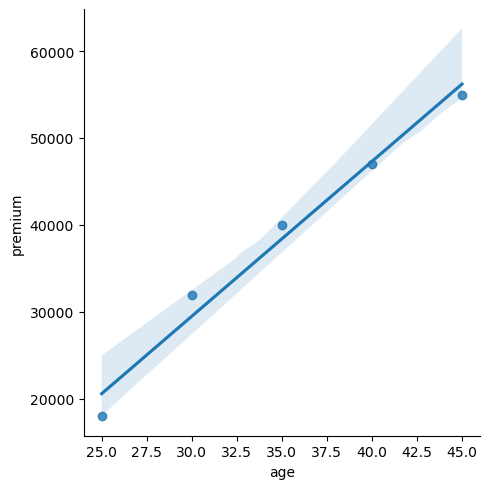

In [45]:
import seaborn as sns

sns.lmplot(x="age",y="premium",data=df)

We check the BEST-FIT LINE for your Model so we create lmplot to visulaize the data and see which variable has best fit line with target variable.

In [46]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

In [47]:
# fit variables in linear regression model

reg.fit(df[['age']],df[['premium']])

LinearRegression()

In [48]:
# model is completed let's predict something to test the model

reg.predict([[50]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[65100.]])

In [49]:
reg.predict([[21]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13480.]])

# Linear Regression (Multiple Variables)


* We use when the target variable depends on multiple factors.


* Eg:- 
* a) Crops depends on climatic factors and use of raw multiple raw materials. 
* b) Prediction of house cost depends on multiple factors like no. of bedrooms, no. of kitechens, toilets, bathroom, halls,location, etc.

In [50]:
df = pd.read_excel(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\B1.xlsx')
df

,age,height,weight,premium
0,25,162.56,70,18000
1,30,172.72,95,32000
2,35,167.64,78,40000
3,40,NaN,110,47000
4,45,157.48,85,55000


In case of missing values we don't drop columns because it results in loss of information so, we fill them with mean, median, mode.

In [51]:
df.height.mean()

165.1

In [52]:
x = df.height.mean()

In [53]:
df.height = df.height.fillna(x)

In [54]:
df

,age,height,weight,premium
0,25,162.56,70,18000
1,30,172.72,95,32000
2,35,167.64,78,40000
3,40,165.10,110,47000
4,45,157.48,85,55000


Your Data Set is ready to perform Linear Regression 

In [55]:
reg = linear_model.LinearRegression()

In [56]:
reg.fit(df[['age','height','weight']],df['premium'])

LinearRegression()

In [57]:
reg.predict([[22,167,70]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14228.63948013])

# Polynomial Regression 


* The goal of polynomial regression is to model a non-linear relationship between the independent and dependent variables (technically, between the independent variable and the conditional mean of the dependent variable).


* Polynomial Regression work same as Linear Regression but when data have non-linear distribution with target variable we use polynomial Regression

In [58]:
df = pd.read_excel(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\B2.xlsx')
df

,Position,Level,Salary
0,Bussiness Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [59]:
x = df.iloc[:,1:2]
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [60]:
# we want array not series so, we convert it into array

x = df.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [61]:
y = df.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

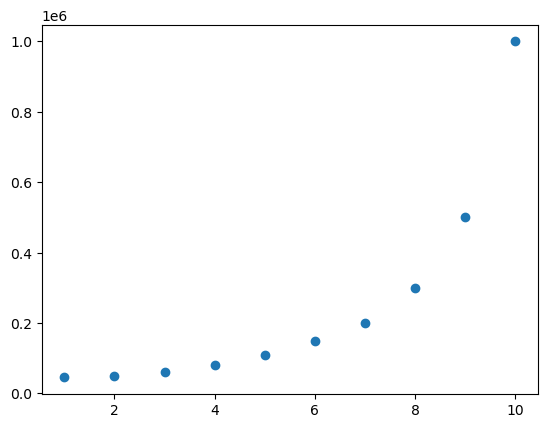

In [62]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

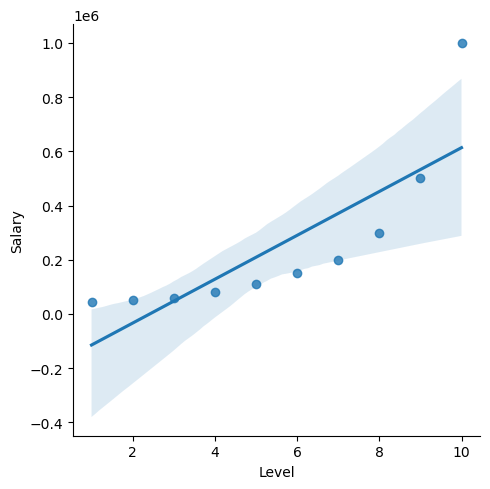

In [63]:
sns.lmplot(x='Level',y='Salary',data=df)
plt.show()

In [64]:
from sklearn import linear_model

In [65]:
reg = linear_model.LinearRegression()

In [66]:
reg.fit(x,y)

LinearRegression()

In [67]:
reg.predict([[6.5]])

array([330378.78787879])

* AS YOU SEE MODEL IS NOT WORKING PROPERLY BECAUSE DATA HAVING NON-LINEAR DISTRIBUTION AS YOU SEE ABOVE IN PLOTS.


* WE ADD ONE MORE STEP HERE OF POLYNOMIAL REGRESSION TO IMPROVE YOUR MODEL

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
poly = PolynomialFeatures(degree=2) 

# We change the degree but if we increase the degree more our model should be overfitted and not work with more accuracy

In [70]:
x_poly = poly.fit_transform(x)

In [71]:
reg.fit(x_poly,y)

LinearRegression()

In [72]:
reg.predict(poly.fit_transform([[6.5]]))

array([189498.10606061])

AS YOU SEE NOW OUR MODEL WORKS PROPERLY

# What is Logistics Regression?


* Logistic Regression is a machine learning algorithm based on supervised learning.


* It is a statistical method that is used for predicting probability of target variable. Logistic Regression makes probability for classification problems that are discrete in nature.


* Example :- English or Hindi, True or False, 1 or 0, Right or wrong, cat or dog or goat.

# Types of Classification :- 


* Binary Classification :- There is two categories in target variable. Eg: Win or Loss, dead or alive.
        
        
* Multi-Class Classification :- There is more than two categories in target variable. Eg: onion, potato, sweet potato etc.     

# Real-World Example of Logistics Regression:-


* USe in medical sector to predict the heart attack or any disease in a person.


* Use in banking sector at various places like find that any person is eligible for loan, credit card or not.


* Use in making spam filters for mails.


*  It is used to calculate or predict the probability of a binary (yes/no) event occurring. An example of logistic regression could be applying machine learning to determine if a person is likely to be infected with COVID-19 or not.

# Logistics Regression (Binary Classification)

In [73]:
df = pd.read_excel(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\B3.xlsx')
df

,age,bought_insurance
0,21,N
1,45,Y
2,32,Y
3,41,Y
4,20,N
5,35,Y
6,20,N
7,23,N
8,42,Y
9,34,Y


Target Variable is in categorical form so we convert it into numerical 


In [74]:
df['bought_insurance'].replace({'N':'0','Y':'1'},inplace=True)

In [75]:
df.head(3)

,age,bought_insurance
0,21,0
1,45,1
2,32,1


In [76]:
x = df.iloc[:,:1]
y = df.iloc[:,1:2]

In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [79]:
lr.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [80]:
lr.predict(X_test)

array(['0', '1', '1', '1'], dtype=object)

In [81]:
lr.predict([[20]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)

In [82]:
lr.predict([[55]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)

As you see our model works properly.

# Logistic Regression (Multiclass Classification)


* When the target variable is in categorical form and have more than 2 categories we use Logistic Regression (Multiclass Classification)

In [83]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
df.shape

(150, 6)

In [85]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [86]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [87]:
df.Species.replace({'Iris-setosa':'0','Iris-versicolor':'1','Iris-virginica':'2'},inplace=True)

In [88]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0


In [89]:
x = df.iloc[:,:5]
y = df.iloc[:,5:6]

In [90]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [91]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [92]:
lr.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
lr.predict(X_test)

array(['2', '1', '0', '2', '0', '2', '0', '1', '1', '1', '2', '1', '1',
       '1', '1', '0', '1', '1', '0', '0', '2', '1', '0', '0', '2', '0',
       '0', '1', '1', '0', '2', '1', '0', '2', '2', '1', '0', '1', '1',
       '1', '2', '0', '2', '0', '0'], dtype=object)

As you see our model start giving prediction

In [94]:
X_test  #'Iris-setosa':'0','Iris-versicolor':'1','Iris-virginica':'2'

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,115,5.8,2.8,5.1,2.4
62,63,6.0,2.2,4.0,1.0
33,34,5.5,4.2,1.4,0.2
107,108,7.3,2.9,6.3,1.8
7,8,5.0,3.4,1.5,0.2
100,101,6.3,3.3,6.0,2.5
40,41,5.0,3.5,1.3,0.3
86,87,6.7,3.1,4.7,1.5
76,77,6.8,2.8,4.8,1.4
71,72,6.1,2.8,4.0,1.3


In [95]:
lr.score(X_test,y_test)

1.0

As you see the score of our model is 100% 

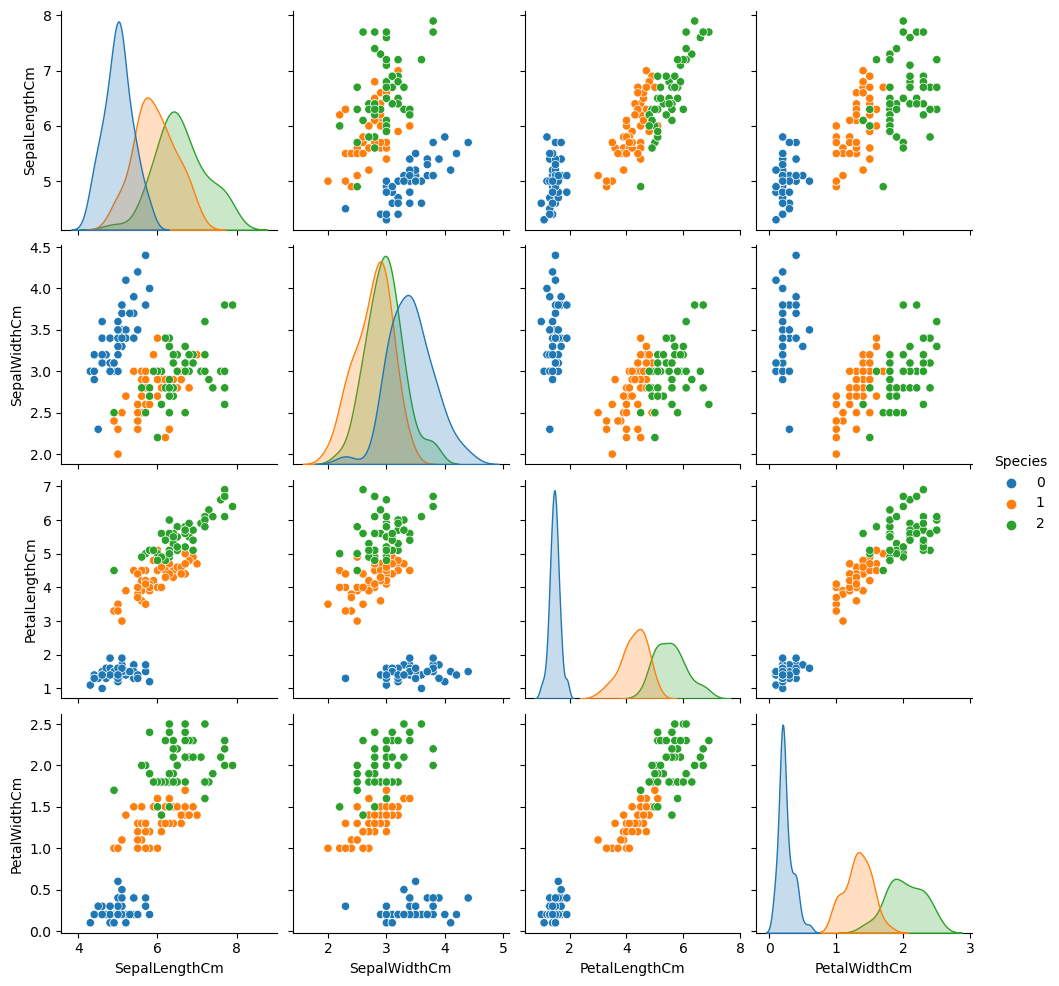

In [96]:
import seaborn as sns

sns.pairplot(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']],hue='Species')
plt.show()


In [97]:
lr.predict([[1,4.5,2.6,7.5,6.5]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)

As you see our model works properly

# What is Decision Tree?


* Decision Tree is a machine learning algoritm based on supervised learning, that can be used for both regression and classification problems.


* The goal is to build up a classifier model that can predict the class or value of the target variable.


* Usually use for classification problems. 

# Use of Decision Tree Algorithm in real world :-


* Decision trees are used for handling non-linear data sets effectively. 


* The decision tree tool is used in real life in many areas, such as engineering, civil planning, law, and business. 


* Decision trees can be divided into two types; categorical variable and continuous variable decision trees.

In [98]:
df = pd.read_excel(r"C:\Users\HP\Desktop\Data Science\Data Sets For Practice\B4.xlsx")
df

,outlook,humidity,windy,play
0,sunny,high,weak,no
1,sunny,high,strong,no
2,overcast,high,weak,yes
3,rainy,high,weak,yes
4,rainy,normal,weak,yes
5,rainy,normal,strong,no
6,overcast,normal,weak,yes
7,sunny,high,weak,no
8,sunny,normal,weak,yes
9,rainy,normal,weak,yes


Data is in categorical form so we convert it into numerical

In [99]:
from sklearn.preprocessing import LabelEncoder

outlook = LabelEncoder()
humidity = LabelEncoder()
windy = LabelEncoder()
play = LabelEncoder()

In [100]:
df['outlook']=outlook.fit_transform(df['outlook'])
df['humidity']=outlook.fit_transform(df['humidity'])
df['windy']=outlook.fit_transform(df['windy'])
df['play']=outlook.fit_transform(df['play'])

In [101]:
df

,outlook,humidity,windy,play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,1,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


* Independent variables = 'outlook', 'humidity', 'windy'
* dependent/target variable = 'play'

In [102]:
X = df.drop(labels=['play'],axis=1)
X

,outlook,humidity,windy
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,1
7,2,0,1
8,2,1,1
9,1,1,1


In [103]:
y = df['play']
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
# criterion : {"gini", "entropy"}, default="gini"
# The function to measure the quality of a split.
# Supported criteria are"gini" for the Gini impurity and "entropy" for the information gain.

classifier = DecisionTreeClassifier(criterion='gini')

In [107]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
classifier.predict(X_test)

array([1, 1, 1])

In [109]:
X_test  # outlook(overcast=0, rainy=1, sunny=2)

,outlook,humidity,windy
8,2,1,1
6,0,1,1
4,1,1,1


In [110]:
classifier.score(X_test,y_test)

1.0

As you see our decision tree model work properly.


In [111]:
classifier.predict([[1,2,0]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

0 = no , 1 = yes

In [112]:
# Decision Tree Chart

from sklearn import tree 
tree.plot_tree(classifier)

[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5555555555555556, 0.7, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.888888

### Try Same Problem with entropy parameter


* Usually it work same as 'gini' but hardly in 2-3% cases it will improve the score of model

In [113]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [114]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [115]:
classifier.predict(X_test)

array([1, 1, 1])

In [116]:
classifier.score(X_test,y_test)

1.0

In [117]:
classifier.predict([[0,2,1]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

0 = no , 1 = yes

In [118]:
# Decision Tree Chart

from sklearn import tree 
tree.plot_tree(classifier)

[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5555555555555556, 0.7, 'X[1] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples 

'gini' parameter is much efficient than 'entropy' in terms of computing power


# What is Random Forest Algoritm?


* Random Forest is a machine learning algorithm based on supervised learning, that cab be used for both Regression and Classification problems.


* It is a collection of multiple random decision trees, which is called the forest.


* When multiple decision trees comes together it will form Random Forest.


* It will have better accuracy and efficient performance than decision tree but it will take more time.


* It will create multiple decision trees of same data and every single decision tree makes output then it will count decisions of all decision trees and based on them it will give us a single output which is more efficient and accurate.


# Use of Random Forest Algoritm in real world :-


* Random forest is used on the job by data scientists in many industries including banking, stock trading, medicine, and e-commerce.


* It's used to predict the things which help these industries run efficiently, such as customer activity, patient history, and safety.

In [119]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
df.Species.replace({'Iris-setosa':'0','Iris-versicolor':'1','Iris-virginica':'2'},inplace=True)

In [121]:
X = df.iloc[:,1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [122]:
y=df.iloc[:,5:6]
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [123]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
# n_estimators=100 means no. of trees created. By default it is 100
# criterion='gini'/'entropy' these are splitting techniques

clf = RandomForestClassifier(n_estimators=100,criterion='gini') 

In [126]:
clf.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Temp\ipykernel_4140\993133242.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier()

In [127]:
clf.predict(X_test)

array(['2', '1', '0', '2', '0', '2', '0', '1', '1', '1', '2', '1', '1',
       '1', '1', '0', '1', '1', '0', '0', '2', '1', '0', '0', '2', '0',
       '0', '1', '1', '0', '2', '1', '0', '2', '2', '1', '0', '2', '1',
       '1', '2', '0', '2', '0', '0'], dtype=object)

In [128]:
X_test.head()            # ('Iris-setosa':'0','Iris-versicolor':'1','Iris-virginica':'2')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [129]:
clf.score(X_test,y_test)

0.9777777777777777

As you see our model is working properly with 97.7% accuracy.

In [130]:
clf.predict([[3,5,4,2]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)

In [131]:
clf.predict([[3,3,2,2]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)

### How to check important features for model building from dataset

In [132]:
imp_features = pd.Series(clf.feature_importances_).sort_values(ascending=False)

In [133]:
imp_features # ('SepalLengthCm':0, 'SepalWidthCm':1, 'PetalLengthCm':2, 'PetalWidthCm':3)

2    0.469123
3    0.406087
0    0.099936
1    0.024855
dtype: float64

0,1,2,3 are column index 

## Remove the least important feature then build a new model and check their accuracy

In [134]:
x  = df[['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']]
x

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [135]:
y = df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: object

In [136]:
X_train,X_test,y_train,y_split = train_test_split(x,y,test_size=0.3,random_state=0)

In [137]:
clf = RandomForestClassifier()

In [138]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [139]:
clf.predict(X_test)

array(['2', '1', '0', '2', '0', '2', '0', '1', '1', '1', '2', '1', '1',
       '1', '1', '0', '1', '1', '0', '0', '2', '1', '0', '0', '2', '0',
       '0', '1', '1', '0', '2', '1', '0', '2', '2', '1', '0', '2', '1',
       '1', '2', '0', '2', '0', '0'], dtype=object)

In [140]:
clf.score(X_test,y_test)

0.9777777777777777

As you see there is no differnce in accuracy of model but when we try it on large data set it will improve the accuracy score of model

In [141]:
clf.predict([[3,2,0]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)

# What is Naive Byes Classifier Algorithm?


* Naive Byes Classifier is Machine Learning Algorithm based on supervised learning , that can be used for solving classifing problems.


* It is a probabilistics classifier, which means it predicts on the basis of probability of an object.

# Why the name Naive Byes?

It comprises of two words naive and byes :-


* Naive :- It is called naive because it makes the assumption that all attributes are independent of each other.


* Byes :- It's called byes because it depends on the principle of baye's Theorem.


# Where Naive Byes Algorithm use in real world?

* Naive Bayes is mostly used in real-world applications like sentiment analysis, spam filtering, recommendation systems, etc. They are extremely fast and easy to implement as compared to other machine learning models.


* Use to make face recognising model use in mobile phones and many other places.


* Use to make a model which predicts weather.


* Online News platforms use naive byes like google news which use into categorizing the news. Eg:- It differenciate the news into categories like sports news, financial news, crime news, political news, etc.

In [146]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Data Science\Data Sets For Practice\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [147]:
df.shape

(400, 5)

In [185]:
X = df.drop(['User ID','Purchased'],axis=1)
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


Convert this data set numpy array

In [186]:
X = df.drop(['User ID','Purchased'],axis=1).values
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [157]:
y = df['Purchased'].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In Data Set 'Gender' column is in categorical form so we convert it into numerical

In [156]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [188]:
X[:,0] = le.fit_transform(X[:,0])

In [189]:
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [205]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [206]:
from sklearn.naive_bayes import GaussianNB

In [207]:
model = GaussianNB()

In [208]:
model.fit(X_train,y_train)

GaussianNB()

In [209]:
model.predict(X_test)  # purchased =1 , not_purchased = 0

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [210]:
X_test  # male =1, female=0

array([[1, 30, 87000],
       [0, 38, 50000],
       [1, 35, 75000],
       [0, 30, 79000],
       [0, 35, 50000],
       [1, 27, 20000],
       [0, 31, 15000],
       [1, 36, 144000],
       [0, 18, 68000],
       [1, 47, 43000],
       [1, 30, 49000],
       [0, 28, 55000],
       [1, 37, 55000],
       [1, 39, 77000],
       [1, 20, 86000],
       [0, 32, 117000],
       [1, 37, 77000],
       [1, 19, 85000],
       [0, 55, 130000],
       [1, 35, 22000],
       [0, 35, 47000],
       [0, 47, 144000],
       [0, 41, 51000],
       [1, 47, 105000],
       [0, 23, 28000],
       [0, 49, 141000],
       [0, 28, 87000],
       [1, 29, 80000],
       [0, 37, 62000],
       [0, 32, 86000],
       [1, 21, 88000],
       [1, 37, 79000],
       [1, 57, 60000],
       [1, 37, 53000],
       [1, 24, 58000],
       [1, 18, 52000],
       [1, 22, 81000],
       [0, 34, 43000],
       [0, 31, 34000],
       [0, 49, 36000],
       [1, 27, 88000],
       [1, 41, 52000],
       [0, 27, 84000],
     

In [211]:
model.score(X_test,y_test)

0.8916666666666667

In [214]:
model.predict([[1,23,100000]])

array([0], dtype=int64)

As you see the accuracy score of our model is 89% and it is working properly.

# What is Support Vector Machine?


* Support Vector Machine is machine learning algorithm based on supervised learning, that can be used for both regression and classification problems.


* We use this in both cases regression and classification but usually we use this to solve classification problems.


* SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages.


* For Regression problem we used to predict quantity of something and in classification problems we predict class or label.


* In this algoritm we use labelled dataset to train our model and test it with unlabelled data.


# Type of SVM :-


* Linear SVM : It is used when dataset can be classified into 2 classes using a straight line.


* Non-Linear SVM : It is used when the dataset cannot be classified into 2 classes using a straigt line. 

# Kernel Function :- 


* It is a technique to seprate different categories. It takes low dimensional space and return high dimensional space.


* Kernal Function takes low input space and transform it into a higher dimensional space. Eg: It creates not sepratable probelm to sepratable probelm.

In [215]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [216]:
df.shape

(150, 6)

In [218]:
x = df.drop(['Id','Species'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [221]:
y = df.drop(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],axis=1)
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [222]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [223]:
X_train.shape

(105, 4)

In [224]:
X_test.shape

(45, 4)

In [225]:
from sklearn.svm import SVC

In [228]:
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
# If the model's accuracy score is less than try different kernel parameters it will improve the accuracy of model.

model = SVC(kernel='linear')  #kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

In [229]:
model.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [230]:
model.predict(X_test)

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [232]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
102,7.1,3.0,5.9,2.1
141,6.9,3.1,5.1,2.3
67,5.8,2.7,4.1,1.0
128,6.4,2.8,5.6,2.1
35,5.0,3.2,1.2,0.2


In [233]:
model.score(X_test,y_test)

1.0

In [234]:
model.predict([[5.6,3,6.2,2.7]])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

As you see our model works properly and give prediction.